{'store_nbr': 'station_nbr', '1': '1', '2': '14', '3': '7', '4': '9', '5': '12', '6': '14', '7': '6', '8': '4', '9': '17', '10': '12', '11': '10', '12': '11', '13': '6', '14': '16', '15': '13', '16': '2', '17': '20', '18': '17', '19': '15', '20': '7', '21': '3', '22': '10', '23': '17', '24': '9', '25': '13', '26': '17', '27': '10', '28': '7', '29': '3', '30': '19', '31': '17', '32': '13', '33': '3', '34': '17', '35': '5', '36': '18', '37': '13', '38': '14', '39': '8', '40': '13', '41': '12', '42': '14', '43': '11', '44': '12', '45': '16'}
4617601
4617601
Item  9
['2012-01-01', '1', '9', '29']
['2012-01-02', '1', '9', '60']
['2012-01-03', '1', '9', '15']
['2012-01-04', '1', '9', '20']
['2012-01-05', '1', '9', '16']
['2012-01-06', '1', '9', '12']
['2012-01-07', '1', '9', '2']
['2012-01-08', '1', '9', '22']
['2012-01-09', '1', '9', '50']
['2012-01-10', '1', '9', '25']
['2012-01-11', '1', '9', '26']
['2012-01-12', '1', '9', '32']
['2012-01-13', '1', '9', '29']
['2012-01-14', '1', '9', '48'

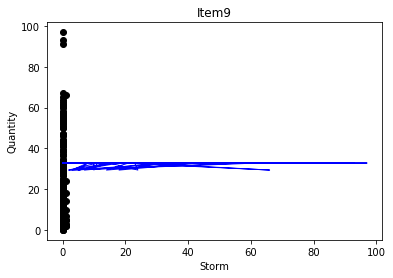

In [1]:
import csv
keys_csv = open('key.csv', 'rt')
keys=csv.reader(keys_csv)
store_station={}
for store,station in keys:
    store_station[store]=station

print(store_station)
weather_csv = open('weather.csv', 'rt')
weather=csv.reader(weather_csv)
date_station_snowfall_rain={}
for w in weather:
    stationnumber=w[0]
    date=w[1]
    snowfall=w[13]
    rain=w[14]
    date_station_snowfall_rain[date+"_"+stationnumber]=snowfall+"_"+rain

train_csv = open('train.csv', 'rt')
train=csv.reader(train_csv)
train_date_store_item_units={}
count=0
for date,store_nbr,item_nbr,units in train:
       train_date_store_item_units[date+"_"+store_nbr+"_"+item_nbr]=units


print(len(train_date_store_item_units))
#Final
date_store_station_item_quantity={}
def calculateResults(preds,dev_labels):
    correct, total = 0, 0
    for pred, label in zip(preds, dev_labels):
        if pred == label:
            correct += 1
        total += 1
   
    return correct/total

train_csv1 = open('train.csv', 'rt')
train1=csv.reader(train_csv1)
train=[]
for t in train1:
    train.append(t)
print(len(train))

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

for i in range(9,10):
    item =i
    date=[]
    quantity=[]
    snowfall=[]
    rain=[]
    print("Item ",item)
    for t in train:
        #Veryify item number
        #hard coding store number 1
        #date    store_nbr    item_nbr    units
        if str(item)==t[2] and t[1]==str(1):
            #adding the date
            print(t)
            date.append(t[0])
             #store_station[store_number] gives weather data
            snowfall.append(date_station_snowfall_rain[t[0]+"_"+store_station[t[1]]].split("_")[0])
            rain.append(date_station_snowfall_rain[t[0]+"_"+store_station[t[1]]].split("_")[1])
            #appending quantity
            #print(t)
            quantity.append(t[3])
        count+=1
    #print(“snowfall:“,snowfall)
    #print(“rain:“,rain)
    rain_date={}
    storm=[]
    sold=[]
    for r in zip(rain,date,quantity):
        print(r)
        try:
            if float(r[0])>0.5:
                storm.append(float(1))
                sold.append(int(r[2]))
            else:
                storm.append(float(0))#not a storm
                sold.append(int(r[2]))
        except ValueError:
            continue
    #print(“quantity:“,quantity) 

    regr = linear_model.LinearRegression()
    print(len(storm))
    limit=500
    storm_train=np.array(storm[:limit])
    storm_test=np.array(storm[limit:])
    sold_train=np.array(sold[:limit])
    sold_test=np.array(sold[limit:])
   
    storm_train = storm_train[:, np.newaxis]
    storm_test = storm_test[:, np.newaxis]
    sold_train = sold_train[:, np.newaxis]
    sold_test = sold_test[:, np.newaxis]
    # Train the model using the training sets
    regr.fit(storm_train, sold_train)
    preds=regr.predict(storm_test)
   
    print("The accuracy is:", calculateResults(preds,sold_test))

    # Plot outputs
    plt.scatter(storm_test, sold_test,  color='black')
    plt.plot(sold_test, regr.predict(storm_test), color='blue',
             linewidth=1)
    plt.xlabel("Storm")
    plt.ylabel("Quantity")
    #plt.xticks(())
    plt.title("Item"+str(item))
    #plt.yticks(())
 
    plt.show()

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from random import shuffle

train_no_header = train[1:len(train)]
header = ['date', 'store_nbr', 'item_nbr', 'units', 'weekday']

shuffle(train_no_header)

# add in day of the week variable where 0=Monday and 6=Sunday and every other day in between
train_new_variables = []
for x in train_no_header:
    year, month, day = (int(z) for z in x[0].split('-'))    
    day_of_week = datetime.date(year, month, day).weekday()
    day_of_year = datetime.date(year, month, day).timetuple().tm_yday
    month_of_year = datetime.date(year, month, day).month
    train_new_variables.append(x + [day_of_week] + [day_of_year] + [month_of_year])

columns = [1, 2, 4, 6]
data = [[each_list[i] for i in columns] for each_list in train_new_variables]
labels = [train_new_variables[i][3] for i in range(0, len(train_new_variables))]

# split into train and dev datasets
train_data = data[len(train)//2:]
train_labels = labels[len(train)//2:]
dev_data = data[:len(train)//2]
dev_labels = labels[:len(train)//2]

# change data into floats
train_data = np.array(train_data).astype(np.float)
train_labels = np.array(train_labels).astype(np.float)
dev_data = np.array(dev_data).astype(np.float)
dev_labels = np.array(dev_labels).astype(np.float)

# Linear Regression using store_nbr, item_nbr, and day of the week
lr = LinearRegression()
linear_model = lr.fit(train_data, train_labels)
prediction = linear_model.predict(dev_data)
accuracy = linear_model.score(dev_data, dev_labels)

In [2]:
# WalMart Kaggle Competition evaluation metric
#This basically shows the error rate
#We want it to be as low as possible
def errorEvaulation(predict, actual):
    return np.sqrt((np.log10(predict+1) - np.log10(actual+1) ** 2).mean())


In [3]:
holidays=['2012-01-31','2012-01-16','2012-02-20','2012-05-28','2012-07-04','2012-09-03','2012-10-08','2012-11-12','2012-11-22','2012-12-25',
'2013-01-01','2013-01-21','2013-02-18','2013-05-27','2013-07-04','2013-09-02','2013-10-14','2013-11-11','2013-11-28','2013-12-25','2014-01-01',
'2014-01-20','2014-02-17','2014-05-26','2014-07-04','2014-09-01','2014-10-10','2014-11-11','2014-11-27','2014-12-25',
]

In [4]:
#### initial testing the score after adding in variables: Fridays, weekends, public holidays from 2012-2014

import matplotlib.pyplot as plt
import numpy as np
import datetime
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from random import shuffle

train_no_header = train[1:len(train)]
shuffle(train_no_header)

# add in day of the week variable where 0=Monday and 6=Sunday and every other day in between
train_new_variables = []
for x in train_no_header:
    year, month, day = (int(z) for z in x[0].split('-'))    
    day_of_week = datetime.date(year, month, day).weekday()
    day_of_year = datetime.date(year, month, day).timetuple().tm_yday
    month_of_year = datetime.date(year, month, day).month
    if day_of_week==4:
        is_friday=1
    else:
        is_friday=0
    if day_of_week in [4,5,6]:
        is_weekend=1
    else:
        is_weekend=0
    if x[0] in holidays:
        holiday_var=1
    else:
        holiday_var=0
    train_new_variables.append(x + [day_of_week] + [day_of_year] + [month_of_year] +[holiday_var] + [is_friday] + [is_weekend])
    
# our headers for reference
header = ['date', 'store_nbr', 'item_nbr', 'units', 'day_of_week', 'day_of_year', 'month_of_year',
         'holiday', 'is_friday', 'is_weekend']

columns = [1, 2, 6, 7, 9]

data = [[each_list[i] for i in columns] for each_list in train_new_variables]
labels = [train_new_variables[i][3] for i in range(0, len(train_new_variables))]

# split into train and dev datasets
train_data = data[len(train)//2:]
train_labels = labels[len(train)//2:]
dev_data = data[:len(train)//2]
dev_labels = labels[:len(train)//2]

# change data into floats
train_data = np.array(train_data).astype(np.float)
train_labels = np.array(train_labels).astype(np.float)
dev_data = np.array(dev_data).astype(np.float)
dev_labels = np.array(dev_labels).astype(np.float)

# Linear Regression using store_nbr, item_nbr, and day of the week
lr = LinearRegression()
linear_model = lr.fit(train_data, train_labels)
prediction = linear_model.predict(dev_data)
accuracy = linear_model.score(dev_data, dev_labels)

print(errorEvaulation(prediction, dev_labels))

0.445150709842


In [26]:
#### prediction excluding zero units sold from data

# only consider training set for zero units sold
data2 = data[len(train)//2:]
labels2 = labels[len(train)//2:]
train_new_variables2 = train_new_variables[len(train)//2:]

# change labels from str to int
labels_int = [int(labels2[i]) for i in range(0, len(labels2))]

# turn data to pandas df
import pandas as pd
df = pd.DataFrame(
    {header[1] : [data2[i][0] for i in range(0, len(data2))],
    header[2]: [data2[i][1] for i in range(0, len(data2))],
    header[3]: labels_int},
    columns = [header[1], header[2], header[3]])

# sum of units sold grouped by store and item
units_sold_by_store_and_item = df.groupby([header[1], header[2]], as_index=False).sum()

# list of zero units sold using grouping of store and item
zero_units_sold_list = []
for i in range(0, len(units_sold_by_store_and_item)):
    if units_sold_by_store_and_item['units'][i] == 0:
        zero_units_sold_list += [[units_sold_by_store_and_item['store_nbr'][i], 
                                  units_sold_by_store_and_item['item_nbr'][i]]]
        
# new dataset called data_without_zeros containing no stores and items that sold zero units
data_without_zeros=[]
for i in range(0, len(train_new_variables2)):
    if [train_new_variables2[i][1], train_new_variables2[i][2]] not in zero_units_sold_list:
        data_without_zeros += [train_new_variables2[i]]

# new dev data without zeros
train_new_variables3 = train_new_variables[:len(train)//2]
dev_data_without_zeros=[]
for i in range(0, len(train_new_variables3)):
    if [train_new_variables3[i][1], train_new_variables3[i][2]] not in zero_units_sold_list:
        dev_data_without_zeros += [train_new_variables3[i]]

# same block as above now using data_without_zeros instead of train_new_variables dataset
columns = [1, 2, 6, 7, 9]

train_data_no_zeros = [[each_list[i] for i in columns] for each_list in data_without_zeros]
train_labels_no_zeros = [data_without_zeros[i][3] for i in range(0, len(data_without_zeros))]
dev_data_no_zeros = [[each_list[i] for i in columns] for each_list in dev_data_without_zeros]
dev_labels_no_zeros = [dev_data_without_zeros[i][3] for i in range(0, len(dev_data_without_zeros))]

# change data into floats
train_data_no_zeros = np.array(train_data_no_zeros).astype(np.float)
train_labels_no_zeros = np.array(train_labels_no_zeros).astype(np.float)
dev_data_no_zeros = np.array(dev_data_no_zeros).astype(np.float)
dev_labels_no_zeros = np.array(dev_labels_no_zeros).astype(np.float)

# Linear Regression using store_nbr, item_nbr, and day of the week
lr_no_zeros = LinearRegression()
linear_model_no_zeros = lr_no_zeros.fit(train_data_no_zeros, train_labels_no_zeros)
prediction_no_zeros = linear_model_no_zeros.predict(dev_data_no_zeros)

# next test is to remove all 0 units sold
for i in range(0, len(prediction_no_zeros)):
    if prediction_no_zeros[i] + 1 < 0:
        prediction_no_zeros[i] = 0

print("RMSLE for predicting on dataset excluding all zero units sold.\nWithout prediction = 0 for zero sold items: ",
      errorEvaulation(prediction_no_zeros, dev_labels_no_zeros), "\nNumber of datapoints:", len(prediction_no_zeros))

# dev data for predictions
dev_data_without_zeros_for_rmsle=[]
for i in range(0, len(train_new_variables3)):
    if [train_new_variables3[i][1], train_new_variables3[i][2]] not in zero_units_sold_list:
        dev_data_without_zeros_for_rmsle += [train_new_variables3[i]]
    elif train_new_variables3[i][3] != '0':
        dev_data_without_zeros_for_rmsle += [train_new_variables3[i]]
        
dev_data_for_rmsle = [[each_list[i] for i in columns] for each_list in dev_data_without_zeros_for_rmsle]
dev_labels_for_rmsle = [dev_data_without_zeros[i][3] for i in range(0, len(dev_data_without_zeros_for_rmsle))]
dev_data_for_rmsle = np.array(dev_data_for_rmsle).astype(np.float)
dev_labels_for_rmsle = np.array(dev_labels_for_rmsle).astype(np.float)

zeros = np.array([0])
dev_label_zeros = np.repeat(zeros, len(dev_labels) - len(dev_labels_for_rmsle))
dev_labels_final = np.concatenate((dev_labels_for_rmsle, dev_label_zeros))

prediction_zeros = np.repeat(zeros, len(prediction) - len(prediction_no_zeros))
prediction_final = np.concatenate((prediction_no_zeros, prediction_zeros))

print("RMSLE for predicting on dataset with zero units sold added back in. \nIf dev label is in zero unit sold then prediction = 0: ",
      errorEvaulation(prediction_final, dev_labels_final), "\nNumber of datapoints:", len(prediction_final))

RMSLE for predicting on dataset excluding all zero units sold.
Without prediction = 0 for zero sold items:  0.367636528467 
Number of datapoints: 117792
RMSLE for predicting on dataset with zero units sold added back in. 
If dev label is in zero unit sold then prediction = 0:  0.083039246072 
Number of datapoints: 2308800


In [6]:
#### prediction excluding zero units sold from data (with small modification to dev data from previous block)

# only consider training set for zero units sold
data2 = data[len(train)//2:]
labels2 = labels[len(train)//2:]
train_new_variables2 = train_new_variables[len(train)//2:]

# change labels from str to int
labels_int = [int(labels2[i]) for i in range(0, len(labels2))]

# turn data to pandas df
import pandas as pd
df = pd.DataFrame(
    {header[1] : [data2[i][0] for i in range(0, len(data2))],
    header[2]: [data2[i][1] for i in range(0, len(data2))],
    header[3]: labels_int},
    columns = [header[1], header[2], header[3]])

# sum of units sold grouped by store and item
units_sold_by_store_and_item = df.groupby([header[1], header[2]], as_index=False).sum()

# list of zero units sold using grouping of store and item
zero_units_sold_list = []
for i in range(0, len(units_sold_by_store_and_item)):
    if units_sold_by_store_and_item['units'][i] == 0:
        zero_units_sold_list += [[units_sold_by_store_and_item['store_nbr'][i], 
                                  units_sold_by_store_and_item['item_nbr'][i]]]
        
# new dataset called data_without_zeros containing no stores and items that sold zero units
data_without_zeros=[]
for i in range(0, len(train_new_variables2)):
    if [train_new_variables2[i][1], train_new_variables2[i][2]] not in zero_units_sold_list:
        data_without_zeros += [train_new_variables2[i]]

# new dev data without zeros
train_new_variables3 = train_new_variables[:len(train)//2]
dev_data_without_zeros=[]
for i in range(0, len(train_new_variables3)):
    if [train_new_variables3[i][1], train_new_variables3[i][2]] not in zero_units_sold_list:
        dev_data_without_zeros += [train_new_variables3[i]]
    elif train_new_variables3[i][3] != '0':
        dev_data_without_zeros += [train_new_variables3[i]]

# same block as above now using data_without_zeros instead of train_new_variables dataset
columns = [1, 2, 6, 7, 9]

train_data_no_zeros = [[each_list[i] for i in columns] for each_list in data_without_zeros]
train_labels_no_zeros = [data_without_zeros[i][3] for i in range(0, len(data_without_zeros))]
dev_data_no_zeros = [[each_list[i] for i in columns] for each_list in dev_data_without_zeros]
dev_labels_no_zeros = [dev_data_without_zeros[i][3] for i in range(0, len(dev_data_without_zeros))]

# change data into floats
train_data_no_zeros = np.array(train_data_no_zeros).astype(np.float)
train_labels_no_zeros = np.array(train_labels_no_zeros).astype(np.float)
dev_data_no_zeros = np.array(dev_data_no_zeros).astype(np.float)
dev_labels_no_zeros = np.array(dev_labels_no_zeros).astype(np.float)

# Linear Regression using store_nbr, item_nbr, and day of the week
lr_no_zeros = LinearRegression()
linear_model_no_zeros = lr_no_zeros.fit(train_data_no_zeros, train_labels_no_zeros)
prediction_no_zeros = linear_model_no_zeros.predict(dev_data_no_zeros)

# next test is to remove all 0 units sold
for i in range(0, len(prediction_no_zeros)):
    if prediction_no_zeros[i] + 1 < 0:
        prediction_no_zeros[i] = 0

print("RMSLE for predicting on dataset excluding all zero units sold.\nWithout prediction = 0 for zero sold items: ",
      errorEvaulation(prediction_no_zeros, dev_labels_no_zeros), "\nNumber of datapoints:", len(prediction_no_zeros))

zeros = np.array([0])
dev_label_zeros = np.repeat(zeros, len(dev_labels) - len(dev_labels_no_zeros))
dev_labels_final = np.concatenate((dev_labels_no_zeros, dev_label_zeros))

prediction_zeros = np.repeat(zeros, len(prediction) - len(prediction_no_zeros))
prediction_final = np.concatenate((prediction_no_zeros, prediction_zeros))

print("RMSLE for predicting on dataset with zero units sold added back in. \nIf dev label is in zero unit sold then prediction = 0: ",
      errorEvaulation(prediction_final, dev_labels_final), "\nNumber of datapoints:", len(prediction_final))

RMSLE for predicting on dataset excluding all zero units sold.
Without prediction = 0 for zero sold items:  0.359502927777 
Number of datapoints: 118187
RMSLE for predicting on dataset with zero units sold added back in. 
If dev label is in zero unit sold then prediction = 0:  0.081338119814 
Number of datapoints: 2308800


In [ ]:
###### test submission block
import time
start_time = time.time()

holidays=['2012-01-31','2012-01-16','2012-02-20','2012-05-28','2012-07-04','2012-09-03','2012-10-08','2012-11-12','2012-11-22','2012-12-25',
'2013-01-01','2013-01-21','2013-02-18','2013-05-27','2013-07-04','2013-09-02','2013-10-14','2013-11-11','2013-11-28','2013-12-25','2014-01-01',
'2014-01-20','2014-02-17','2014-05-26','2014-07-04','2014-09-01','2014-10-10','2014-11-11','2014-11-27','2014-12-25',
]

import csv
keys_csv = open('key.csv', 'rt')
keys=csv.reader(keys_csv)
store_station={}
for store,station in keys:
    store_station[store]=station

weather_csv = open('weather.csv', 'rt')
weather=csv.reader(weather_csv)
date_station_snowfall_rain={}
for w in weather:
    stationnumber=w[0]
    date=w[1]
    snowfall=w[13]
    rain=w[14]
    date_station_snowfall_rain[date+"_"+stationnumber]=snowfall+"_"+rain

train_csv = open('train.csv', 'rt')
train=csv.reader(train_csv)
train_date_store_item_units={}
count=0
for date,store_nbr,item_nbr,units in train:
       train_date_store_item_units[date+"_"+store_nbr+"_"+item_nbr]=units
        
train_csv1 = open('train.csv', 'rt')
train1=csv.reader(train_csv1)
train=[]
for t in train1:
    train.append(t)
    
test_csv = open('test.csv', 'rt')
test=csv.reader(test_csv)
test_date_store_item_units={}
count=0
for date,store_nbr,item_nbr in test:
       test_date_store_item_units[date+"_"+store_nbr+"_"+item_nbr]=units
        
#Final
date_store_station_item_quantity={}
def calculateResults(preds,dev_labels):
    correct, total = 0, 0
    for pred, label in zip(preds, dev_labels):
        if pred == label:
            correct += 1
        total += 1
   
    return correct/total

test_csv1 = open('test.csv', 'rt')
test1=csv.reader(test_csv1)
test=[]
for t in test1:
    test.append(t)

#Testing the score after adding in variables: Fridays, weekends, public holidays from 2012-2014

import matplotlib.pyplot as plt
import numpy as np
import datetime
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from random import shuffle

train_no_header = train[1:len(train)]
shuffle(train_no_header)

# add in day of the week variable where 0=Monday and 6=Sunday and every other day in between
train_new_variables = []
for x in train_no_header:
    year, month, day = (int(z) for z in x[0].split('-'))    
    day_of_week = datetime.date(year, month, day).weekday()
    day_of_year = datetime.date(year, month, day).timetuple().tm_yday
    month_of_year = datetime.date(year, month, day).month
    if day_of_week==4:
        is_friday=1
    else:
        is_friday=0
    if day_of_week in [4,5,6]:
        is_weekend=1
    else:
        is_weekend=0
    if x[0] in holidays:
        holiday_var=1
    else:
        holiday_var=0
    train_new_variables.append(x + [day_of_week] + [day_of_year] + [month_of_year] +[holiday_var] + [is_friday] + [is_weekend])
    
# our headers for reference
header = ['date', 'store_nbr', 'item_nbr', 'units', 'day_of_week', 'day_of_year', 'month_of_year',
         'holiday', 'is_friday', 'is_weekend']

train_columns = [1, 2, 6, 7, 9]

train_data = [[each_list[i] for i in train_columns] for each_list in train_new_variables]
train_labels = [train_new_variables[i][3] for i in range(0, len(train_new_variables))]

# test set
test_no_header = test[1:len(test)]

# add in day of the week variable where 0=Monday and 6=Sunday and every other day in between
test_new_variables = []
for x in test_no_header:
    year, month, day = (int(z) for z in x[0].split('-'))    
    day_of_week = datetime.date(year, month, day).weekday()
    day_of_year = datetime.date(year, month, day).timetuple().tm_yday
    month_of_year = datetime.date(year, month, day).month
    if day_of_week==4:
        is_friday=1
    else:
        is_friday=0
    if day_of_week in [4,5,6]:
        is_weekend=1
    else:
        is_weekend=0
    if x[0] in holidays:
        holiday_var=1
    else:
        holiday_var=0
    test_new_variables.append(x + [day_of_week] + [day_of_year] + [month_of_year] +[holiday_var] + [is_friday] + [is_weekend])
    
# our headers for reference
test_header = ['date', 'store_nbr', 'item_nbr', 'day_of_week', 'day_of_year', 'month_of_year',
         'holiday', 'is_friday', 'is_weekend']

test_columns = [1, 2, 5, 6, 8]

test_data = [[each_list[i] for i in test_columns] for each_list in test_new_variables]

# change data into floats
train_data = np.array(train_data).astype(np.float)
train_labels = np.array(train_labels).astype(np.float)
test_data = np.array(test_data).astype(np.float)

# Linear Regression using store_nbr, item_nbr, and day of the week
lr = LinearRegression()
linear_model = lr.fit(train_data, train_labels)
prediction = linear_model.predict(test_data)

print("initial predict done", time.time()-start_time)

#### prediction excluding zero units sold from data

# change labels from str to int
train_labels_int = [int(train_labels[i]) for i in range(0, len(train_labels))]

# turn data to pandas df
import pandas as pd
df = pd.DataFrame(
    {header[1] : [train_data[i][0] for i in range(0, len(train_data))],
    header[2]: [train_data[i][1] for i in range(0, len(train_data))],
    header[3]: train_labels_int},
    columns = [header[1], header[2], header[3]])

# sum of units sold grouped by store and item
units_sold_by_store_and_item = df.groupby([header[1], header[2]], as_index=False).sum()

# list of zero units sold using grouping of store and item
zero_units_sold_list = []
for i in range(0, len(units_sold_by_store_and_item)):
    if units_sold_by_store_and_item['units'][i] == 0:
        zero_units_sold_list += [[units_sold_by_store_and_item['store_nbr'][i], 
                                  units_sold_by_store_and_item['item_nbr'][i]]]

print("Zero units sold list created", time.time()-start_time)

# new training dataset called data_without_zeros containing no stores and items that sold zero units
data_without_zeros=[]
for i in range(0, len(train_new_variables)):
    if [train_new_variables[i][1], train_new_variables[i][2]] not in zero_units_sold_list:
        data_without_zeros += [train_new_variables[i]]
        if i == 10000:
            print("10k", time.time()-start_time)
        elif i == 50000:
            print("50k", time.time()-start_time)
        elif i == 100000:
            print("100k", time.time()-start_time)
        elif i == 500000:
            print("500k", time.time()-start_time)

train_data_no_zeros = [[each_list[i] for i in train_columns] for each_list in data_without_zeros]
train_labels_no_zeros = [data_without_zeros[i][3] for i in range(0, len(data_without_zeros))]

print("training data without zeros done", time.time()-start_time)

# change data into floats
train_data_no_zeros = np.array(train_data_no_zeros).astype(np.float)
train_labels_no_zeros = np.array(train_labels_no_zeros).astype(np.float)

# Linear Regression using store_nbr, item_nbr, and day of the week
lr_no_zeros = LinearRegression()
linear_model_no_zeros = lr_no_zeros.fit(train_data_no_zeros, train_labels_no_zeros)
prediction_no_zeros = linear_model_no_zeros.predict(test_data)

# next test is to remove all 0 units sold
for i in range(0, len(prediction_no_zeros)):
    if prediction_no_zeros[i] + 1 < 0:
        prediction_no_zeros[i] = 0

print("prediction with negatives into 0 done", time.time()-start_time)

# if test data is in zero units sold list change prediction to 0
#prediction_final = []
#for i in range(0, len(test_data)):
#    if [test_data[i][1], test_data[i][2]] not in zero_units_sold_list:
#        prediction_final[i] += prediction_no_zeros[i]
#    else:
#        prediction_final[i] += 0


initial predict done 98.33750081062317
Zero units sold list created 105.81050086021423
10k 155.31890296936035
50k 354.3248038291931


initial predict done 92.59108781814575
Zero units sold list created 99.16671586036682


In [ ]:
# if test data is in zero units sold list change prediction to 0
prediction_final = []
for i in range(0, 1000):
    if [test_data[i][1], test_data[i][2]] not in zero_units_sold_list:
        prediction_final[i] += prediction_no_zeros[i]
    else:
        prediction_final[i] += 0

[['2012-01-14', '41', '11', '0', 5, 14, 1, 0, 0, 1],
 ['2014-07-16', '14', '17', '0', 2, 197, 7, 0, 0, 0],
 ['2014-01-08', '29', '42', '0', 2, 8, 1, 0, 0, 0],
 ['2012-06-18', '21', '100', '0', 0, 170, 6, 0, 0, 0],
 ['2013-10-27', '26', '57', '0', 6, 300, 10, 0, 0, 1]]

In [ ]:
submission = []
for i in range(0, prediction_no_zeros):
    submission = [test_data[i][1] + "_" + test_data[i][2] + "_" + test_data[i][0], prediction[i]]

In [ ]:
526917

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from datetime import timedelta

weather_data_all = pd.read_csv('weather.csv')
weather_data = weather_data_all[['station_nbr','date','tavg','depart','codesum','snowfall','preciptotal','avgspeed']]

#Convert date column to actual dates
dates = pd.to_datetime(weather_data['date'])
weather_data['date_2'] = dates
del weather_data['date']
weather_data = weather_data.rename(columns = {'date_2':'date'})


#4 copies of weather_data, one for each of +/- 1 and 2 days
weather_m1 = weather_data.copy()
weather_m2 = weather_data.copy()
weather_p1 = weather_data.copy()
weather_p2 = weather_data.copy()

#Add columns for dates +/- 2 days to original df, for joining on later
weather_data['date_m1'] = weather_data['date'] - timedelta(days = 1)
weather_data['date_m2'] = weather_data['date'] - timedelta(days = 2)
weather_data['date_p1'] = weather_data['date'] + timedelta(days = 1)
weather_data['date_p2'] = weather_data['date'] + timedelta(days = 2)

#Add correct day offset to each df, for joining
weather_m1['date_offset'] = weather_m1['date'] - timedelta(days = 1)
weather_m2['date_offset'] = weather_m2['date'] - timedelta(days = 2)
weather_p1['date_offset'] = weather_p1['date'] + timedelta(days = 1)
weather_p2['date_offset'] = weather_p2['date'] + timedelta(days = 2)

#Merge each of the four copied DFs
weather_data = pd.merge(left = weather_data, right = weather_m1, left_on = ['station_nbr', 'date'], right_on = ['station_nbr', 'date_offset'], how = 'left', suffixes = ('','_m_1'))
del weather_data['date_offset']
weather_data = pd.merge(left = weather_data, right = weather_m2, left_on = ['station_nbr', 'date'], right_on = ['station_nbr', 'date_offset'], how = 'left', suffixes = ('','_m_2'))
del weather_data['date_offset']
weather_data = pd.merge(left = weather_data, right = weather_p1, left_on = ['station_nbr', 'date'], right_on = ['station_nbr', 'date_offset'], how = 'left', suffixes = ('','_p_1'))
del weather_data['date_offset']
weather_data = pd.merge(left = weather_data, right = weather_p2, left_on = ['station_nbr', 'date'], right_on = ['station_nbr', 'date_offset'], how = 'left', suffixes = ('','_p_2'))
del weather_data['date_offset']

#Delete some redundant columns
cols_to_delete = ['date_m1','date_m_1','date_m2','date_m_2','date_p1','date_p_1','date_p2','date_p_2']
for i in cols_to_delete:
    del weather_data[i]
